<a href="https://colab.research.google.com/github/yananma/useful_program/blob/master/DL/MXNet/0501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.12 权重衰减

In [0]:
# !pip install mxnet d2lzh 

In [0]:
%matplotlib inline 
import d2lzh as d2l 
from mxnet import autograd, gluon, init, nd 
from mxnet.gluon import data as gdata, loss as gloss 

n_train, n_test, num_inputs = 20, 100, 200 
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05 

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [0]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1, ))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [0]:
def l2_penalty(w):
    return (w**2).sum() / 2 

In [0]:
import matplotlib.pyplot as plt 

def loss_plot(loss, x_label, y_label, label):
    plt.plot(loss, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [0]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss 
train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)


def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    w_ls = []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
            w_ls.append(w.norm().asscalar())
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
          range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())
    loss_plot(w_ls, 'w', 'w_ls', 'w')

final epoch: train loss 5.6448493e-13 test loss 111.536575


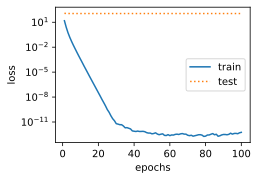

L2 norm of w: 13.511568


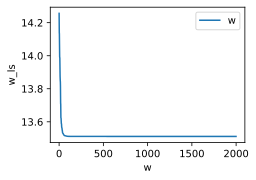

In [22]:
fit_and_plot(lambd=0)

final epoch: train loss 0.000413133 test loss 0.011253958


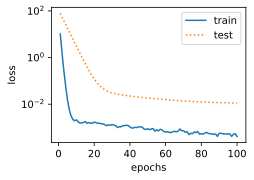

L2 norm of w: 0.044281155


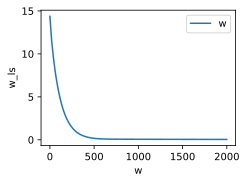

In [23]:
fit_and_plot(lambd=3)

final epoch: train loss 0.0013197964 test loss 0.016775642


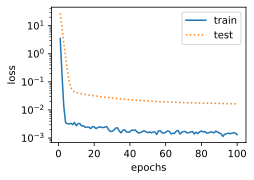

L2 norm of w: 0.0244063


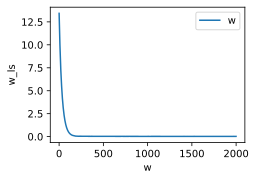

In [24]:
fit_and_plot(lambd=10)